In [314]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
%matplotlib inline


In [315]:
sns.set(style='white')
path = 'D:\Libraries\Documents\Grad_School\Climate_Data\GFK\Precip\Monthly1965-2020.csv'
data = pd.read_csv(path, dtype=float)
data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
0,1965.0,NaN,NaN,NaN,2.92,3.91,3.57,3.72,1.87,5.57,1.11,1.23,0.60,NaN
1,1966.0,0.37,0.49,3.08,1.09,1.29,2.78,7.31,3.30,0.58,0.85,0.31,0.92,22.37
2,1967.0,1.76,0.32,0.56,3.20,0.14,2.45,0.58,0.34,1.35,1.12,0.09,0.82,12.73
3,1968.0,0.53,0.11,0.74,2.50,1.58,6.48,4.89,3.59,1.65,0.46,0.18,0.66,23.37
4,1969.0,1.58,0.54,0.15,0.62,2.09,4.69,1.42,1.97,3.61,1.12,0.05,0.76,18.60


In [321]:
vals = data.to_numpy()[:,1:13]
moMeans = np.nanmean(vals,axis=0)
moMeansT = np.nanmean(vals[15:47],axis=0)
meanDeparts = vals - moMeansT
mask = np.where(vals == np.nan, True, False)
#print(f'moMeans 1965-2020: {moMeans}')
#print(f'moMeans 1981-2010: {moMeansT}')
#print(f'moMeans diff: {moMeans-moMeansT}')

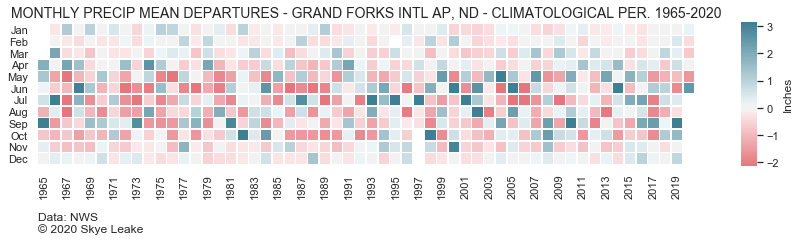

In [322]:
f, ax = plt.subplots(figsize=(11,5), constrained_layout=True)
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(meanDeparts.T, cmap=cmap, mask=mask.T, robust=True, center=0,
            square=True, linewidths=.5, 
            cbar_kws={"shrink": .4, "label": 'Inches'})

# adjust labels
xLabels = list(data.iloc[:,0]) 
xLabels =[int(i) for i in xLabels]
yLabels = list(data.columns)[1:13]
ax.set_xticklabels(xLabels[::2])
plt.xticks(rotation=90)
ax.set_yticklabels(yLabels)
plt.yticks(rotation=0)
ax.set_title('MONTHLY PRECIP MEAN DEPARTURES - GRAND FORKS INTL AP, ND - CLIMATOLOGICAL PER. 1965-2020',
            fontsize=14)

plt.text(0, -.50, 'Data: NWS\n© 2020 Skye Leake', horizontalalignment='left',
     verticalalignment='bottom', transform=ax.transAxes)

plt.savefig(path[:-4] + '_ClimPer1965-2020.png')

In [323]:
def find_runs(x):
    """Find runs of consecutive items in an array."""

    # ensure array
    x = np.asanyarray(x)
    if x.ndim != 1:
        raise ValueError('only 1D array supported')
    n = x.shape[0]

    # handle empty array
    if n == 0:
        return np.array([]), np.array([]), np.array([])

    else:
        # find run starts
        loc_run_start = np.empty(n, dtype=bool)
        loc_run_start[0] = True
        np.not_equal(x[:-1], x[1:], out=loc_run_start[1:])
        run_starts = np.nonzero(loc_run_start)[0]

        # find run values
        run_values = x[loc_run_start]

        # find run lengths
        run_lengths = np.diff(np.append(run_starts, n))

        return run_values, run_starts, run_lengths

In [340]:
#skip seasons to find streches of extended +/- departures

monthMin = 3 #1:Jan, 12:Dec
monthMax = 11 #EXCLUSIVE maximum month
yearMin = 1965
yearMax = 2021


years = xLabels
months = yLabels
yyears,mmonths = np.meshgrid(years, months)
dates = np.array(list(zip(mmonths, yyears))).T
dates = np.array([x.T for x in dates[:]])
dates = dates.reshape(len(years),len(months), 2)[:,monthMin-1:monthMax-1,:]
dates = dates.reshape(dates.shape[0]*dates.shape[1], 2) #years is multiplied by # of months sliced
#print(dates[:20])

meanDepartsFilter = np.nan_to_num(meanDeparts, nan=-999)
meanDepartsFilter = meanDepartsFilter[:,monthMin-1:monthMax-1]
aboveAvg = np.where(meanDepartsFilter.flatten(order='C')> 0.0, 1, 0)

runVals, runStarts, runLengths = find_runs(aboveAvg)
runVals1 = np.where(runVals==1)
runStarts1 = runStarts[runVals1]
runLengths1 = runLengths[runVals1]

print(f'Longest run(s) above average: {max(runLengths1)}')
#print(f'The(se) longest run(s) initiated at: {np.where(runLengths==max(runLengths))}')
print(f'The(se) longest run(s) initiated on:\n{dates[runStarts1[np.where(runLengths1 == max(runLengths1))]]}')
print(f'These runs start on {yLabels[monthMin-1]} and roll over to the following year at the conclusion of {yLabels[monthMax-2]}.')

Longest run(s) above average: 5
The(se) longest run(s) initiated on:
[['Jul' '1995']
 ['Oct' '1998']
 ['Oct' '2009']]
These runs start on Mar and roll over to the following year at the conclusion of Oct.
